# Sentiment Classification with movie reviews

* Sentiment classification wiht IMDB dataset
* Reference code: [TensorFlow official tutorials](https://www.tensorflow.org/tutorials/keras/basic_text_classification?hl=en)

## Import modules

In [3]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

import tensorflow as tf
from tensorflow.keras import layers
tf.enable_eager_execution()

os.environ["CUDA_VISIBLE_DEVICES"]="0"

/home/multi/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Import data

In [4]:
# Load training and eval data from tf.keras
imdb = tf.keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [5]:
train_labels = train_labels.astype(np.float64)
test_labels = test_labels.astype(np.float64)

In [6]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [7]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [8]:
len(train_data[0]), len(train_data[1])

(218, 189)

## Prepare dataset

### Convert the integers back to words

In [9]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [10]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [11]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

### Pad sequences

In [12]:
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [13]:
train_data_pad = pad_sequences(train_data,
                               maxlen=256,
                               padding='post',
                               value=word_index["<PAD>"])
test_data_pad = pad_sequences(test_data,
                              maxlen=256,
                              padding='post',
                              value=word_index["<PAD>"])

In [14]:
print(train_data_pad.shape)
print(test_data_pad.shape)

(25000, 256)
(25000, 256)


In [15]:
index = 0
print("text: {}\n".format(decode_review(train_data[index])))
print("token: {}\n".format(train_data[index]))
print("pad: {}".format(train_data_pad[index]))

text: <START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised f

### Create a validation set

In [16]:
x_val = train_data_pad[:10000]
partial_x_train = train_data_pad[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

## Build the model

In [40]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = tf.keras.models.Sequential()
model.add(layers.Embedding(vocab_size, 16))

#model.add(layers.SimpleRNN(units=32, return_sequences=True))

#model.add(layers.SimpleRNN(units=16))

model.add(layers.CuDNNGRU(units=16))
# val_acc = 0.8135
# accuracy = 0.806

# model.add(layers.CuDNNGRU(units=16, return_sequences=True))
# model.add(layers.CuDNNGRU(units=16))
# val_acc = ?
# accuracy = 0.845

# model.add(layers.CuDNNGRU(units=32, return_sequences=True))
# model.add(layers.CuDNNGRU(units=32))
# val_acc = 0.8566
# accuracy = 0.847

model.add(layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
cu_dnngru_4 (CuDNNGRU)       (None, 16)                1632      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 161,649
Trainable params: 161,649
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [41]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['acc'])

## Train the model

In [42]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 4s 127ms/step - loss: 0.6930 - acc: 0.5090 - val_loss: 0.6922 - val_acc: 0.5257
Epoch 2/20
30/30 [==============================] - 4s 127ms/step - loss: 0.6902 - acc: 0.5392 - val_loss: 0.6901 - val_acc: 0.5279
Epoch 3/20
30/30 [==============================] - 4s 124ms/step - loss: 0.6818 - acc: 0.5768 - val_loss: 0.6815 - val_acc: 0.5409
Epoch 4/20
30/30 [==============================] - 4s 126ms/step - loss: 0.6432 - acc: 0.5962 - val_loss: 0.5826 - val_acc: 0.7154
Epoch 5/20
30/30 [==============================] - 4s 125ms/step - loss: 0.6955 - acc: 0.6208 - val_loss: 0.7393 - val_acc: 0.5704
Epoch 6/20
30/30 [==============================] - 4s 124ms/step - loss: 0.6749 - acc: 0.6129 - val_loss: 0.6933 - val_acc: 0.5702
Epoch 7/20
30/30 [==============================] - 4s 125ms/step - loss: 0.6429 - acc: 0.6160 - val_loss: 0.6736 - val_acc: 0.5712
Epoch 8/20
30/30 [==============================] - 4s 125ms/step - loss: 0.

## Evaluate the model

In [43]:
results = model.evaluate(test_data_pad, test_labels)

782/782 [==============================] - 10s 13ms/step


In [45]:
# loss
print("loss value: {:.3f}".format(results[0]))
# accuracy
print("accuracy value: {:.3f}".format(results[1]))

loss value: 0.486
accuracy value: 0.806


### Print a graph of accuracy and loss over time

In [46]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

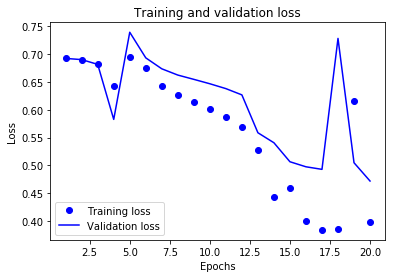

In [47]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

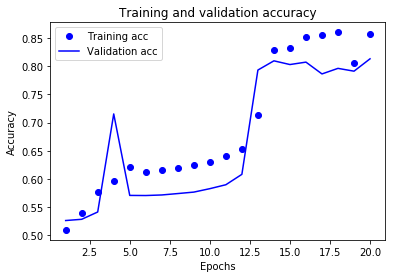

In [48]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()